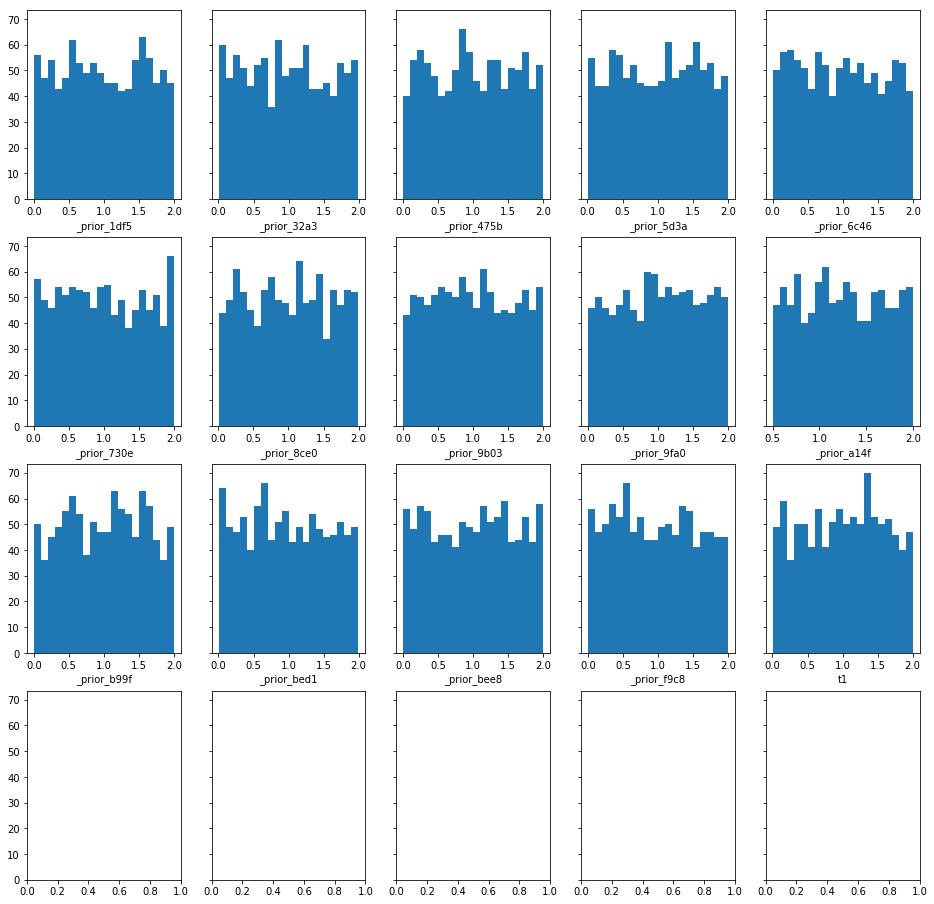

In [17]:
import time

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)  # sometimes this is required to enable logging inside Jupyter
import elfi
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

%matplotlib inline
%precision 2

# Set an arbitrary seed and a global random state to keep the randomly generated quantities the same between runs
seed = 20170530
np.random.seed(seed)

# a node is defined by giving a distribution from scipy.stats together with any arguments (here 0 and 2)
t1 = elfi.Prior('uniform', 0, 2)

# t1 - это массив из batch_size разных значений t1
def MA2(t1, n_obs=1, batch_size=1, random_state=None):
    x = np.where(t1 < 0.5, 1, 0)
    return x

Y = elfi.Simulator(MA2, t1, observed=[[0]])

# Finish the model with the final node that calculates the squared distance (S1_sim-S1_obs)**2 + (S2_sim-S2_obs)**2
d = elfi.Distance('euclidean', Y)

rej = elfi.Rejection(d, batch_size=1000, seed=seed)

N = 1000

# You can give the sample method a `vis` keyword to see an animation how the prior transforms towards the
# posterior with a decreasing threshold.
result = rej.sample(N)

result.plot_marginals();